In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('dark_background')

In [ ]:
from google.colab import files
files.upload()

Saving ds1_test.csv to ds1_test (1).csv
Saving ds1_train.csv to ds1_train (1).csv
Saving ds2_test.csv to ds2_test (1).csv
Saving ds2_train.csv to ds2_train (1).csv


{'ds1_test (1).csv': b'x_1,x_2,y\n2.177395501772196,78.63007649348528,0.0\n3.9521311603966267,123.54157340121738,0.0\n3.3511764604087624,47.752517184092525,0.0\n2.0749336698354233,26.997729893305173,0.0\n3.579775409502788,226.70377921544198,0.0\n2.5683951447993714,196.93198210541195,0.0\n6.362291630643035,1419.0491050837586,0.0\n3.13078087085112,38.06340229532435,0.0\n1.8588000073679187,4.31129237193327,0.0\n3.031352417160926,245.91964772496593,0.0\n4.690324261301112,357.28029536812755,0.0\n2.1153446685905077,23.09299089772126,0.0\n2.716794651762082,273.9803806057827,0.0\n2.9846678961271227,74.46484646455899,0.0\n4.8960869351772525,593.5959922867777,0.0\n1.9880268906502263,47.41776493400127,0.0\n3.112845571045295,104.88608811291655,0.0\n3.7024700018886527,76.3385532048322,0.0\n4.987162245174984,241.12355209352668,0.0\n2.771913223029112,135.84320700930772,0.0\n2.9665029439639206,188.6923259644266,0.0\n1.728445768025497,38.587038450142664,0.0\n3.2454807255298777,42.956533683151015,0.0\n3

In [ ]:
df = pd.read_csv("ds2_train.csv")
dt = pd.read_csv("ds2_test.csv")

In [ ]:
Y_train = df.iloc[:,-1:].values
Y_test = dt.iloc[:,-1:].values

In [ ]:
X_train = df.iloc[:, [0, 1]].values
X_test = dt.iloc[:, [0, 1]].values

In [ ]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 100
        self.num_examples, self.num_features = X.shape

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid
        return centroids

    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters

    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)
            diff = centroids - previous_centroids
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X)
        return y_pred

if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 2
    Kmeans = KMeansClustering(X_train, num_clusters)
    y_pred = Kmeans.fit(X_train)
    num_clusters = 2
    Kmeans = KMeansClustering(X_test, num_clusters)
    y_pred1 = Kmeans.fit(X_test)

In [ ]:
correctly_classified = 0

correctly_classified1 = 0

count = 0

for count in range( np.size( y_pred ) ) :

    if Y_train[count] == y_pred[count] :
            correctly_classified = correctly_classified + 1

    count = count + 1

print( "Accuracy of model on train data % : ", (correctly_classified / count ) * 100 )

count = 0

for count in range( np.size( y_pred1 ) ) :

    if Y_test[count] == y_pred1[count] :
            correctly_classified1 = correctly_classified1 + 1

    count = count + 1

print( "Accuracy of model on test data % : ", (correctly_classified1 / count ) * 100 )

Accuracy of model on train data % :  51.37500000000001
Accuracy of model on test data % :  71.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(2)
kmeans.fit(X_train)

KMeans(n_clusters=2)

In [ ]:
pred_lib_train = kmeans.fit_predict(X_train)
pred_lib_test = kmeans.fit_predict(X_test)

In [ ]:
correctly_classified2 = 0

count = 0

for count in range( np.size( pred_lib_train ) ) :

    if Y_train[count] == pred_lib_train[count] :
            correctly_classified2 = correctly_classified2 + 1

    count = count + 1

print( "Accuracy of model on train data % : ", (correctly_classified2 / count ) * 100 )

correctly_classified3 = 0

count = 0

for count in range( np.size( pred_lib_test ) ) :

    if Y_train[count] == pred_lib_test[count] :
            correctly_classified3 = correctly_classified3 + 1

    count = count + 1

print( "Accuracy of model on test data % : ", (correctly_classified3 / count ) * 100 )

Accuracy of model on train data % :  51.125
Accuracy of model on test data % :  65.0


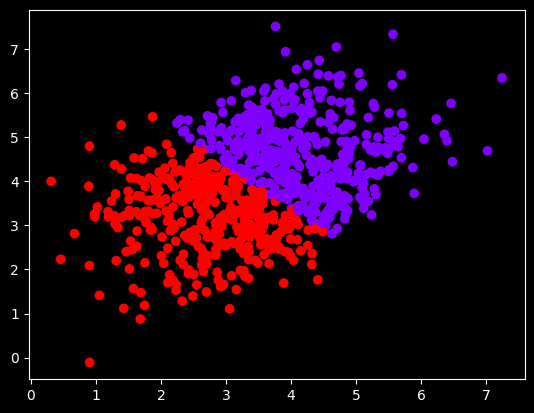

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = pred_lib_train
plt.scatter(data_with_clusters['x_1'],data_with_clusters['x_2'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

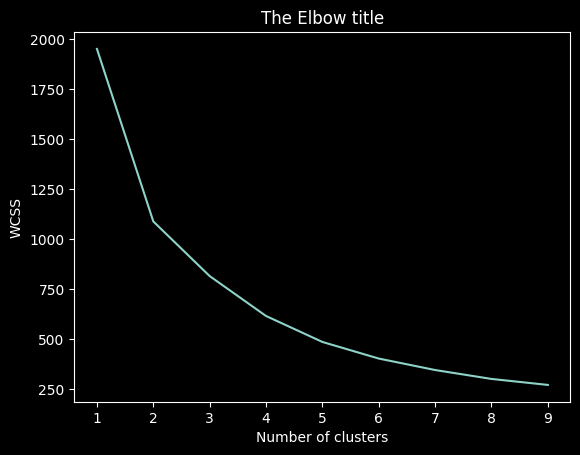

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')